In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")  


In [3]:
print(df.head())
print(df.info())
print(df.describe())



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dropna(subset=['TotalCharges'], inplace=True)

df.reset_index(drop=True, inplace=True)

print(df['Churn'].value_counts())
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):")
print(churn_rate)



Churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn Rate (%):
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


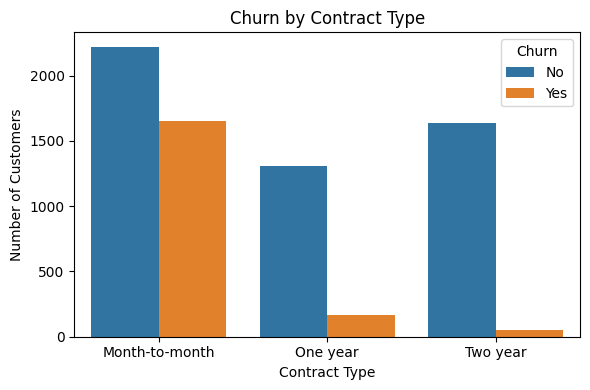

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.ylabel('Number of Customers')
plt.xlabel('Contract Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


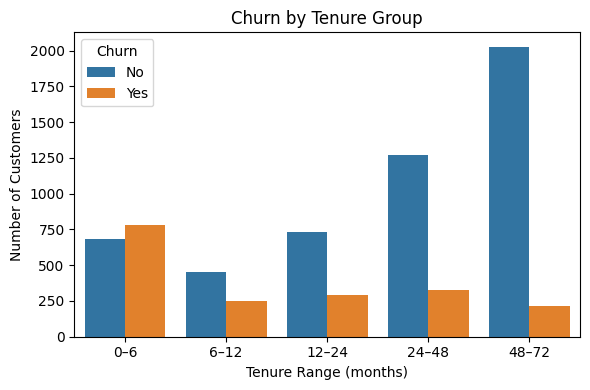

In [6]:
bins = [0, 6, 12, 24, 48, 72]
labels = ['0–6', '6–12', '12–24', '24–48', '48–72']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels)

plt.figure(figsize=(6,4))
sns.countplot(x='TenureGroup', hue='Churn', data=df)
plt.title('Churn by Tenure Group')
plt.xlabel('Tenure Range (months)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()



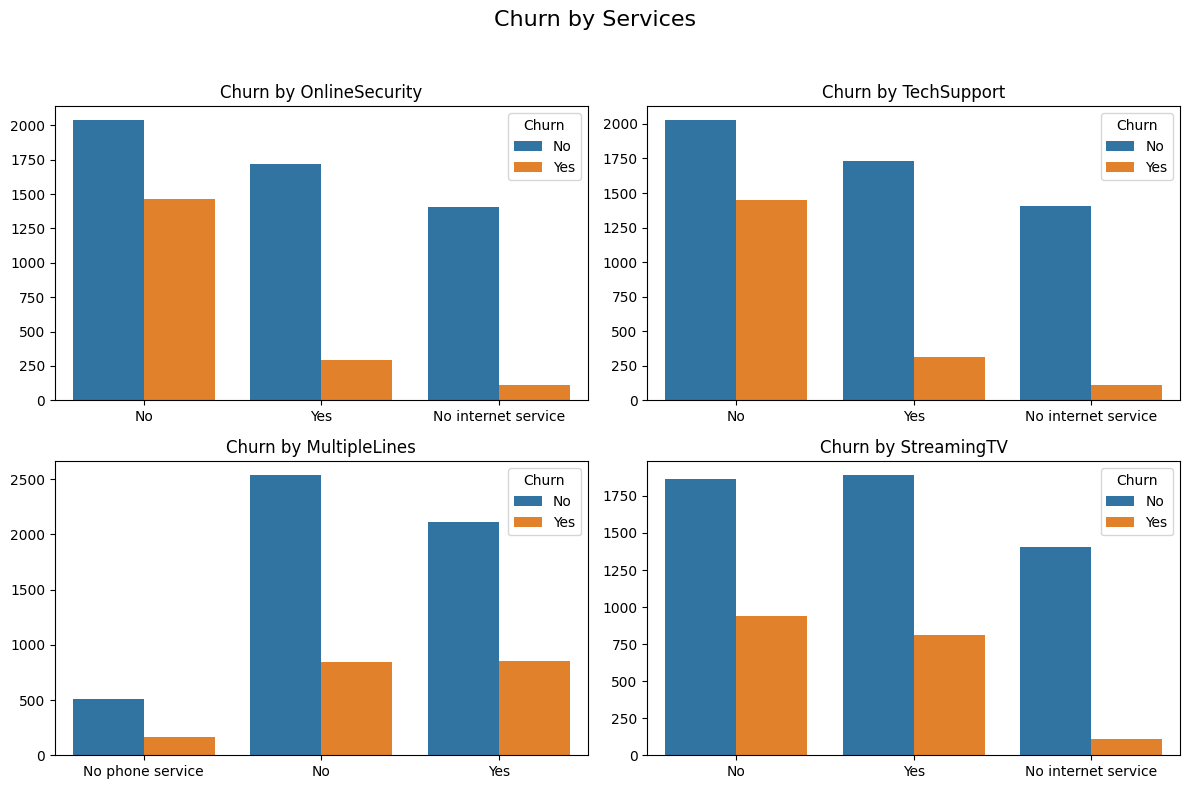

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

services = ['OnlineSecurity', 'TechSupport', 'MultipleLines', 'StreamingTV']

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Churn by Services', fontsize=16)


axes = axes.flatten()

for i, service in enumerate(services):
    sns.countplot(x=service, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn by {service}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()



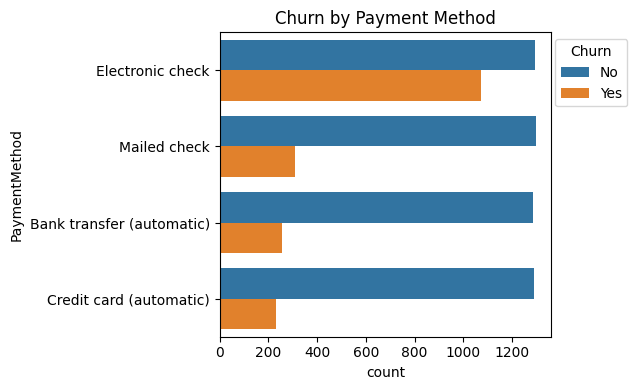

In [8]:
plt.figure(figsize=(7, 4))
sns.countplot(y='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.25, 1))  # Move legend outside the plot
plt.tight_layout()
plt.show()




/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

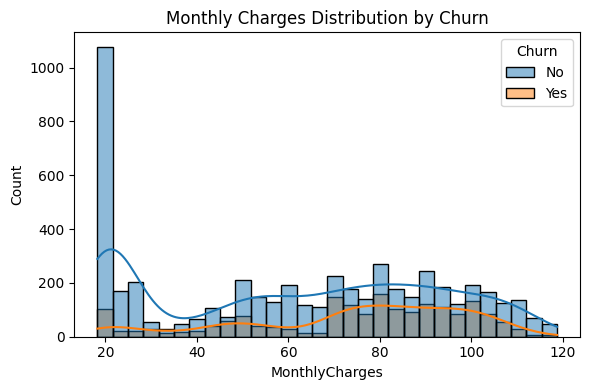

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title('Monthly Charges Distribution by Churn')
plt.tight_layout()
plt.show()


In [10]:
print(df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100)

print(df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100)

# Average MonthlyCharges by Churn
print(df.groupby('Churn')['MonthlyCharges'].mean())

# Churn % by PaymentMethod
print(df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100)

churn_tables = {}
for service in services:
    churn_rate = df.groupby([service])['Churn'].value_counts(normalize=True).unstack() * 100
    churn_rate = churn_rate.rename(columns={'No': 'Churn: No (%)', 'Yes': 'Churn: Yes (%)'})
    churn_rate = churn_rate.reset_index()
    churn_tables[service] = churn_rate
    print(f"\nChurn Rate by {service}:\n")
    print(churn_rate)


Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665
Churn               No        Yes
TenureGroup                      
0–6          46.666667  53.333333
6–12         64.113475  35.886525
12–24        71.289062  28.710938
24–48        79.611041  20.388959
48–72        90.486824   9.513176
Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995

Churn Rate by OnlineSecurity:

Churn       OnlineSecurity  Churn: No (%)  Churn: Yes (%)
0                       No      58.221333       41.778667
1      No internet service      92.565789        7.434211
2     

/tmp/ipykernel_13/2855375562.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100)
